In [104]:
!pip install seaborn

In [105]:
from statistics import correlation

import pandas as pd
from pandas import DataFrame

first_ds = "first_output.csv" # millis 0 = 25/04/2025 00:56
second_ds = "second_output.csv" # millis 0 = 25/04/2025 19:57



In [106]:
first_df = pd.read_csv(first_ds)
first_df

,time_ms,soil,light,temp_c
0,3636,1406,1770,21.2
1,240778,1470,960,21.2
2,1140872,1530,844,21.0
3,2041008,1525,959,21.0
4,2941831,1668,895,21.0
...,...,...,...,...
70,62342854,1528,1033,23.8
71,63240824,1630,833,23.7
72,64140824,1533,963,23.6
73,65040049,1580,798,23.7


In [107]:
second_df = pd.read_csv(second_ds)
second_df

,time_ms,soil,light,temp_c
0,900679,1505,1819,23.3
1,1800719,1467,1766,23.3
2,2700759,1535,1226,23.4
3,3600855,1554,1985,23.4
4,4500895,1459,2013,23.4
...,...,...,...,...
174,157508996,1575,4095,22.1
175,158409092,1595,4095,22.1
176,159309132,1584,4095,22.2
177,160209173,1707,4095,22.0


In [108]:
start_time_first = pd.Timestamp("2025-04-25 00:56:00")

start_time_second = pd.Timestamp("2025-04-25 19:57:00")

first_df["timestamp"] = start_time_first + pd.to_timedelta(first_df["time_ms"], unit="ms")

second_df["timestamp"] = start_time_second + pd.to_timedelta(second_df["time_ms"], unit="ms")

df = pd.concat([first_df, second_df], axis=0)

df= df[["timestamp", "soil", "light", "temp_c"]]

df = df.sort_values("timestamp")
df

,timestamp,soil,light,temp_c
0,2025-04-25 00:56:03.636,1406,1770,21.2
1,2025-04-25 01:00:00.778,1470,960,21.2
2,2025-04-25 01:15:00.872,1530,844,21.0
3,2025-04-25 01:30:01.008,1525,959,21.0
4,2025-04-25 01:45:01.831,1668,895,21.0
...,...,...,...,...
174,2025-04-27 15:42:08.996,1575,4095,22.1
175,2025-04-27 15:57:09.092,1595,4095,22.1
176,2025-04-27 16:12:09.132,1584,4095,22.2
177,2025-04-27 16:27:09.173,1707,4095,22.0


In [109]:
targets = ("Muerta", "Marchita", "Necesita riego", "Saludable", "Ahogada")

In [110]:
df["target"] = None

In [111]:
def assign_target(df, start_timestamp, end_timestamp, label):
    start = pd.to_datetime(start_timestamp)
    end = pd.to_datetime(end_timestamp)


    def set_label(row):
        if start <= pd.to_datetime(row["timestamp"]) < end:
            return label
        return row["target"]

    df["target"] = df.apply(set_label, axis=1)


assign_target(df, "2025-04-25 00:56:00", "2025-04-26 09:00:00", "Saludable")
assign_target(df, "2025-04-26 09:00:00", "2025-04-27 09:00:00", "Necesita riego")
assign_target(df, "2025-04-27 09:00:00", "2025-04-28 00:00:00", "Marchita")

In [136]:
df

,timestamp,soil,light,temp_c,target,target_num
0,2025-04-25 00:56:03.636,1406,1770,21.2,Saludable,2
1,2025-04-25 01:00:00.778,1470,960,21.2,Saludable,2
2,2025-04-25 01:15:00.872,1530,844,21.0,Saludable,2
3,2025-04-25 01:30:01.008,1525,959,21.0,Saludable,2
4,2025-04-25 01:45:01.831,1668,895,21.0,Saludable,2
...,...,...,...,...,...,...
174,2025-04-27 15:42:08.996,1575,4095,22.1,Marchita,4
175,2025-04-27 15:57:09.092,1595,4095,22.1,Marchita,4
176,2025-04-27 16:12:09.132,1584,4095,22.2,Marchita,4
177,2025-04-27 16:27:09.173,1707,4095,22.0,Marchita,4


In [135]:
df.describe()

,timestamp,soil,light,temp_c,target_num
count,254,254.000000,254.000000,254.000000,254.000000
mean,2025-04-26 08:52:12.467838720,1600.976378,2609.271654,21.695669,2.622047
min,2025-04-25 00:56:03.636000,1406.000000,745.000000,19.400000,2.000000
25%,2025-04-25 16:33:45.464250112,1535.000000,960.750000,20.800000,2.000000
50%,2025-04-26 09:04:33.138000128,1594.000000,2463.500000,21.750000,2.500000
75%,2025-04-27 00:53:21.173000192,1637.750000,4095.000000,22.700000,3.000000
max,2025-04-27 16:42:09.214000,2057.000000,4095.000000,24.300000,4.000000
std,NaN,98.385341,1403.780559,1.268289,0.693609


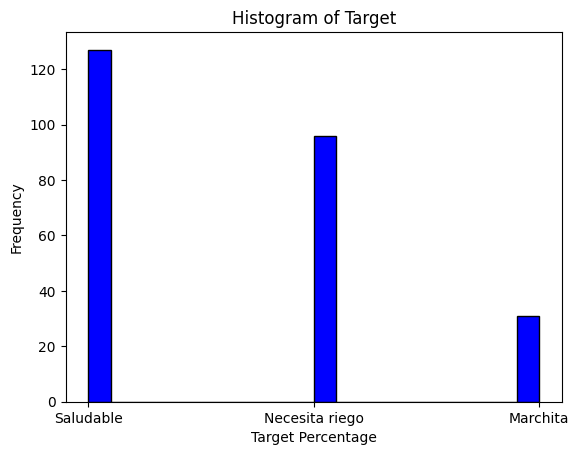

In [113]:
import matplotlib.pyplot as plt

plt.hist(df['target'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Target')
plt.xlabel('Target Percentage')
plt.ylabel('Frequency')
plt.show()

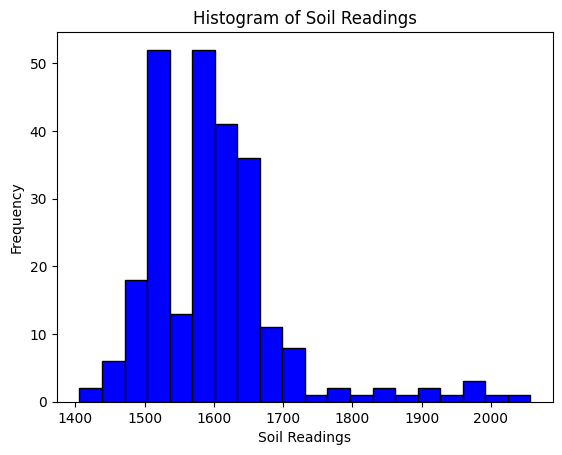

In [114]:
import matplotlib.pyplot as plt

plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

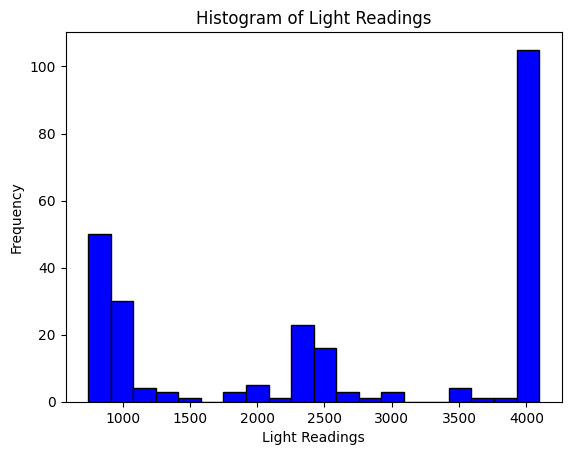

In [115]:
import matplotlib.pyplot as plt

plt.hist(df["light"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Light Readings')
plt.xlabel('Light Readings')
plt.ylabel('Frequency')
plt.show()

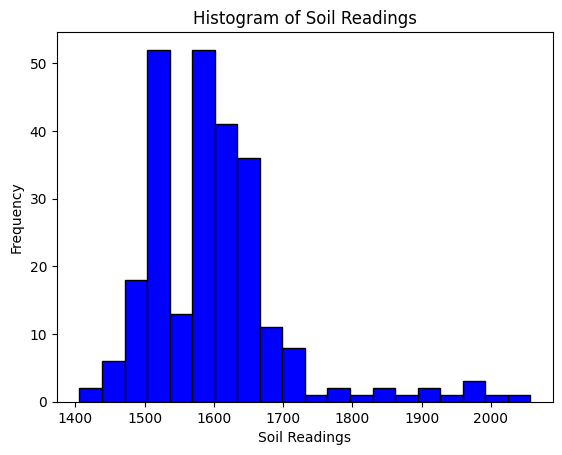

In [116]:
plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

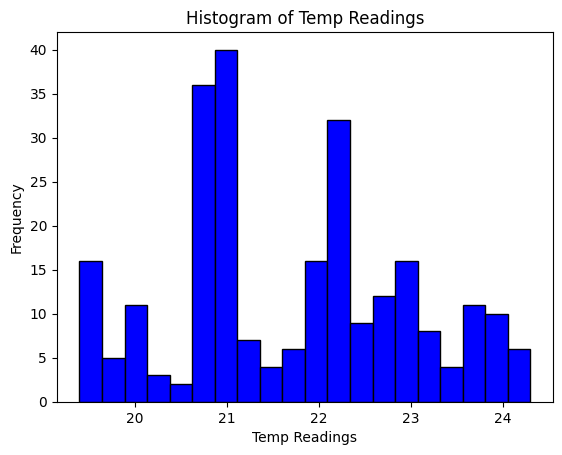

In [117]:
plt.hist(df["temp_c"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Temp Readings')
plt.xlabel('Temp Readings')
plt.ylabel('Frequency')
plt.show()

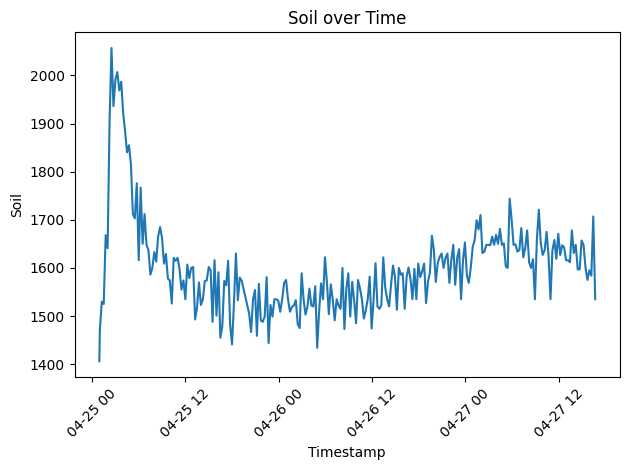

In [118]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['soil'])
plt.xlabel('Timestamp')
plt.ylabel('Soil')
plt.title('Soil over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

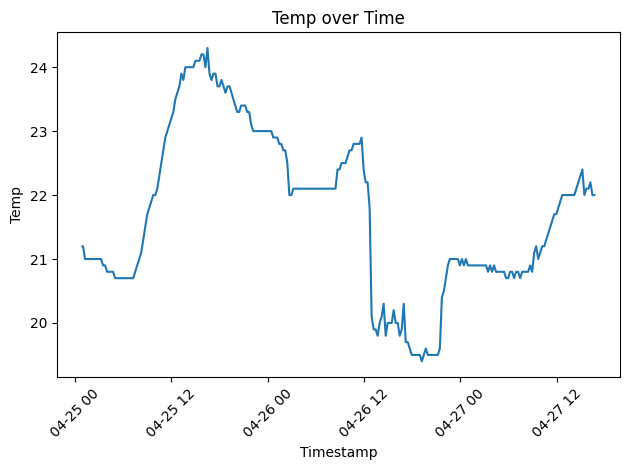

In [119]:
plt.show()
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['temp_c'])
plt.xlabel('Timestamp')
plt.ylabel('Temp')
plt.title('Temp over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

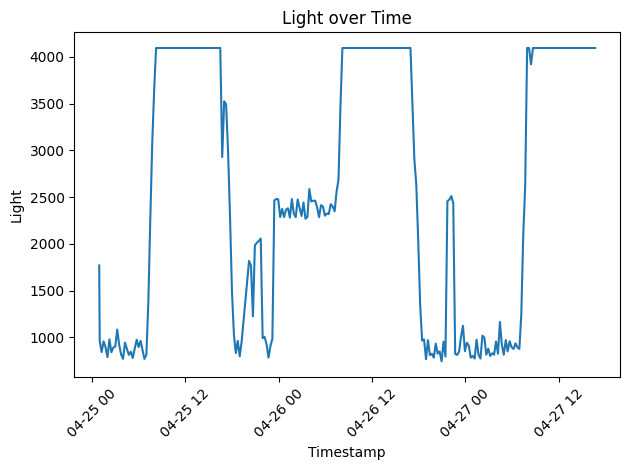

In [120]:
plt.show()
plt.show()
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['light'])
plt.xlabel('Timestamp')
plt.ylabel('Light')
plt.title('Light over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
def map_targets_to_numbers(df):
    mapping = {
        "muerta": 5,
        "marchita": 4,
        "necesita riego": 3,
        "saludable": 2,
        "ahogada": 1
    }
    df["target_num"] = df["target"].str.lower().map(mapping)
map_targets_to_numbers(df)
df

,timestamp,soil,light,temp_c,target,target_num
0,2025-04-25 00:56:03.636,1406,1770,21.2,Saludable,2
1,2025-04-25 01:00:00.778,1470,960,21.2,Saludable,2
2,2025-04-25 01:15:00.872,1530,844,21.0,Saludable,2
3,2025-04-25 01:30:01.008,1525,959,21.0,Saludable,2
4,2025-04-25 01:45:01.831,1668,895,21.0,Saludable,2
...,...,...,...,...,...,...
174,2025-04-27 15:42:08.996,1575,4095,22.1,Marchita,4
175,2025-04-27 15:57:09.092,1595,4095,22.1,Marchita,4
176,2025-04-27 16:12:09.132,1584,4095,22.2,Marchita,4
177,2025-04-27 16:27:09.173,1707,4095,22.0,Marchita,4


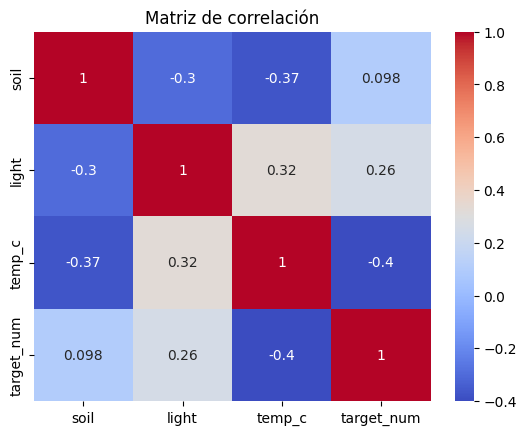

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df[["soil","light","temp_c","target_num"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()



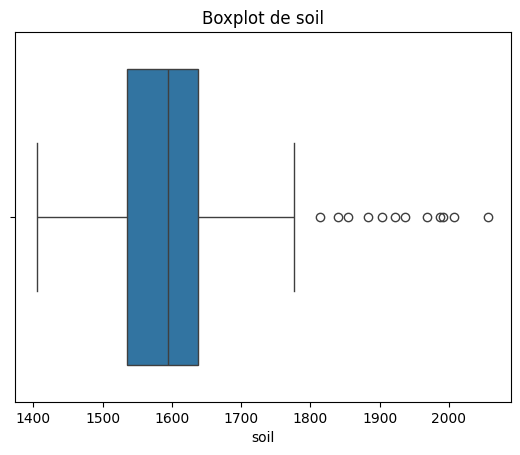

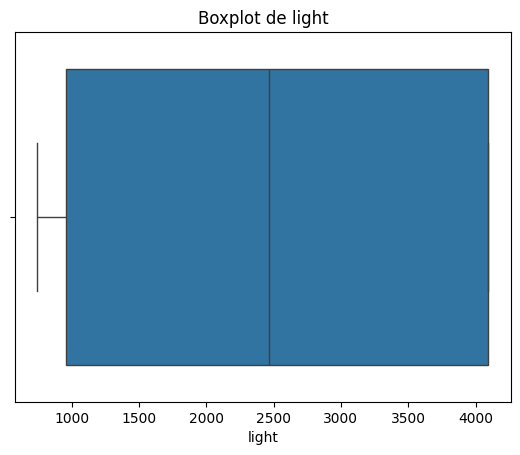

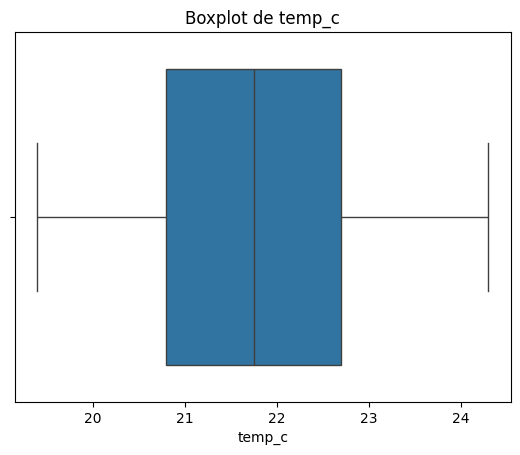

In [124]:
for col in ['soil', 'light', 'temp_c']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


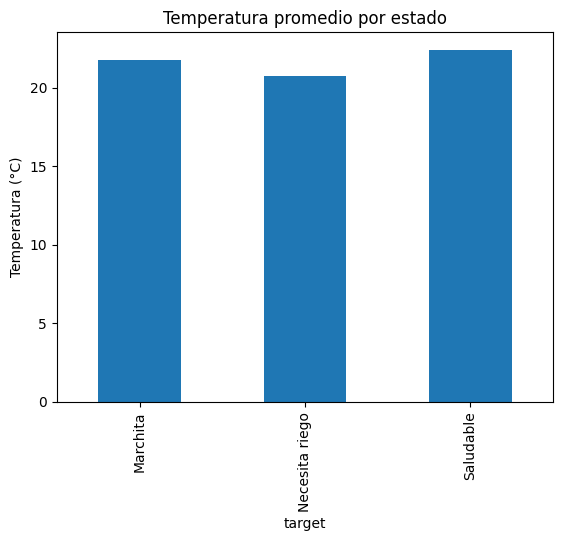

In [125]:
df.groupby('target')['temp_c'].mean().plot(kind='bar')
plt.title('Temperatura promedio por estado')
plt.ylabel('Temperatura (°C)')
plt.show()


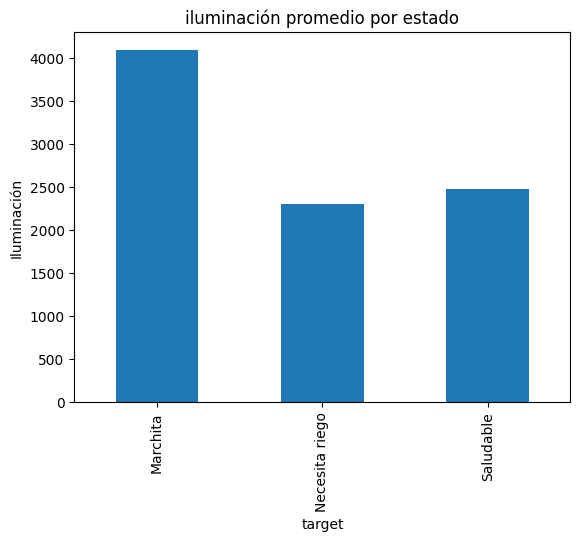

In [126]:
df.groupby('target')['light'].mean().plot(kind='bar')
plt.title('iluminación promedio por estado')
plt.ylabel('Iluminación')
plt.show()

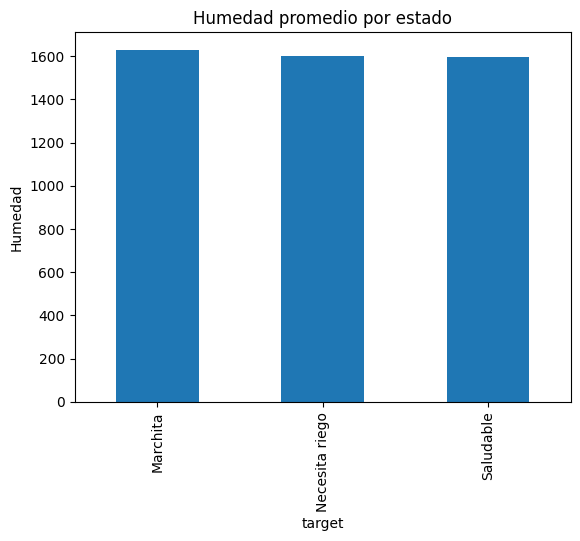

In [128]:
df.groupby('target')['soil'].mean().plot(kind='bar')
plt.title('Humedad promedio por estado')
plt.ylabel('Humedad')
plt.show()

Conclusiones

El dataset refleja una sola tendencia de cambio de estado, únicamente sensamos datos días después de un riego, entonces siempre el estado de la planta en términos de riego fue peor al anterior en el tiempo. Faltaría complementar el mismo con datos de la tendencia contraria (desde ahogada hasta recientemente regada).

La humedad en los 3 estados analizados en promedio presenta valores similares, creemos que esto se debe a que la humedad inicial era un valor cercano a la humedad mínima, por ende prácticamente no ha decrecido en el tiempo, manteniendose baja.

La luz refleja perfectamente la realidad ambiental cada vez que fue sensada. El comportamiento de la temperatura es similar al de la luz. Creemos que esto explica la correlación positiva (0.32) entre ellas. Creemos que tiene sentido ya que al aumentar la luz solar aumenta también la temperatura. Al ver los gráficos de las variables respecto al tiempo notamos que la luz crece drásticamente mientras que la temperatura crece a un ritmo relativamente más líneal en comparación a la anterior. Por este motivo creemos que el valor de la correlación que refleja la matriz es mucho menor al que realmente tienen estas variables.

